In [1]:
## CloudSafe : Optimisation of Mobile AQS mounted on actively deployed buses

In [16]:
import osmnx as ox, networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd, pandas as pd
from shapely.geometry import box
import heapq, json, utils

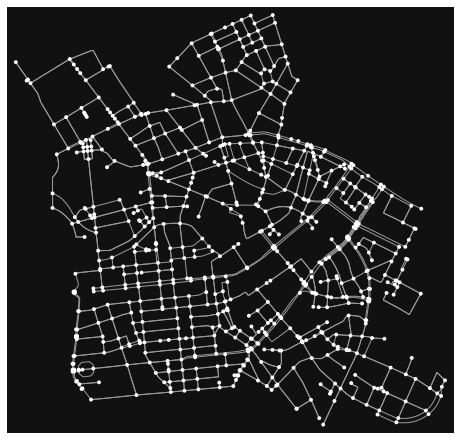

In [6]:
berlin_mitte = 'Mitte, Berlin, Germany'

berlin_mitte_nodes, berlin_mitte_edges = ox.graph_to_gdfs(graph_berlin_mitte)
graph_berlin_mitte = ox.graph_from_place(berlin_mitte, network_type='drive')
# bus_nodes = berlin_mitte_nodes.loc[(nodes['highway'] == 'bus_stop') ]

berlin_mitte_fig, berlin_mitte_ax = ox.plot_graph(graph_berlin_mitte)

In [7]:
berlin_mitte_nodes, berlin_mitte_edges = ox.graph_to_gdfs(graph_berlin_mitte)

In [9]:
berlin_mitte_edges['highway'].value_counts()

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
berlin_mitte_edges.crs # geo system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
tags = {'highway':'bus_stop'}
berlin_mitte_bus_stops = ox.geometries_from_place(berlin_mitte, tags=tags)
berlin_mitte_bus_stops

,unique_id,osmid,element_type,highway,name,shelter,tactile_paving,geometry,wheelchair,bench,note,bin,bus,operator,public_transport,route_ref,survey:date
0,node/30731740,30731740,node,bus_stop,Brunnenstraße/Invalidenstraße,yes,yes,POINT (13.39948 52.53202),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/271295817,271295817,node,bus_stop,Spandauer Straße/Marienkirche,NaN,NaN,POINT (13.40580 52.52031),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/271296143,271296143,node,bus_stop,Spandauer Straße/Marienkirche,NaN,NaN,POINT (13.40616 52.52092),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/272409455,272409455,node,bus_stop,Unter den Linden/Friedrichstraße,NaN,NaN,POINT (13.38993 52.51682),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/272436770,272436770,node,bus_stop,S+U Potsdamer Platz,yes,yes,POINT (13.37856 52.50951),yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,node/7312391556,7312391556,node,bus_stop,U Weinmeisterstraße/Gipsstraße,NaN,NaN,POINT (13.40411 52.52596),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,node/7312391558,7312391558,node,bus_stop,U Weinmeisterstraße/Gipsstraße,NaN,NaN,POINT (13.40353 52.52632),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,node/7312391562,7312391562,node,bus_stop,S+U Alexanderplatz/Memhardstraße,NaN,NaN,POINT (13.41139 52.52335),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,node/7312391565,7312391565,node,bus_stop,S+U Alexanderplatz/Memhardstraße,NaN,NaN,POINT (13.41046 52.52276),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
berlin_mite_area = berlin_mitte_edges.unary_union.convex_hull.area

In [13]:
bbox = box(*berlin_mitte_edges.unary_union.bounds)
print(bbox)

ox.get_nearest_edge

POLYGON ((13.4288049 52.5049088, 13.4288049 52.5398588, 13.3686026 52.5398588, 13.3686026 52.5049088, 13.4288049 52.5049088))


<function osmnx.distance.get_nearest_edge(G, point, return_geom=False, return_dist=False)>